In [5]:
import sys

is_main = __name__ == "__main__"

lin_sys_path = '..\\linear_systems\\'
function_path ='..\\zeros_of_functions\\'

sys.path.append(lin_sys_path)
sys.path.append(function_path)

from Vectors import Vector
from Matrix import Matrix
from Linear_systems import Linear_System
from Functions import Func
from Linear_adjusts import Linear_adjust

import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math

In [6]:
def plot_curve (func: 'Func', axe: 'plt.Axes', interval_x: list, interval_y: list,
                step: float = 0.1, color_val: str = 'b', label_txt: str = '') -> None:    
    """
    Function to plot a given expression curve in a certain interval
    """    
    
    # Create the values of X in the interval
    x_np = np.arange(*interval_x, step)

    # Limit the graph to improve visualization of the curve
    
    axe.set(xlim= interval_x, ylim = interval_y)

    # Plots it
    axe.plot(x_np, func(x_np), color=color_val, label=label_txt)
    axe.legend()

def plot_cartesian_lines (axe, interval_x: list, interval_y: list):
    # plots the x and y lines in black in the axe.
    if not interval_y[1]:
        interval_y = [-10, 10]

    if not interval_x[1]:
        interval_x = [-10, 10]
        
    x_np = np.arange(*interval_x, 0.1)
    y_np = np.arange(*interval_y, 0.1)

    axe.plot(x_np, [0 for  _ in x_np], c='black', label='x')
    axe.plot([0 for _ in y_np], y_np, c='black', label='y')

def plot_func_in_cartesian (func: 'Func', axe: 'plt.Axes', interval_x: list):
    """
    Function used to plot the graph of any function in the cartesian plan.
    in a given x interval
    """

    inter_x, inter_y = intervals(
        interval_x,
        [func.global_max_min('min'), func.global_max_min('max')]
    )

    # Plots the abcisse and ordinate lines
    plot_cartesian_lines(axe, inter_x, inter_y)

    # Plots the function curve
    plot_curve(func, axe, inter_x, inter_y, label_txt='f(x)')
    

def plot_points (x_coordinates: list, y_coordinates: list, axe: 'plt.Axes',
                 marker:str = '.', color_val: str='black', label_txt: str = '', size: int=50):
    """
    Functions to plot a given array of points.
    """
    
    axe.scatter (x_coordinates, y_coordinates, marker=marker,
                 color = color_val, label = label_txt, s = size)
    
def intervals (x_coordinates: list, y_coordinates: list) -> list:
    """
    Function that calculates the best interval to make sure all the
    points will be shown with a good visualization.
    """


    max_x, max_y = max(x_coordinates), max(y_coordinates)

    min_x, min_y = min(x_coordinates), min(y_coordinates)

    # By tests, I found out that 0.75 of the whole interval is the best increment
    # to improve the visualization of the data.
    increment_x = ((max_x - min_x)/len(x_coordinates)) * 0.75
    increment_y = ((max_y - min_y)/len(y_coordinates)) * 0.75

    x_interval = [min_x - increment_x, max_x + increment_x]
    y_interval = [min_y - increment_y, max_y + increment_y]

    return [x_interval, y_interval]

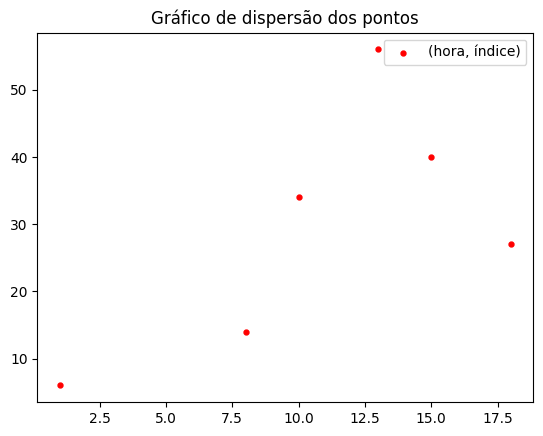

In [111]:
x = sym.symbols('x')

points = [
    (1, 6),
    (8, 14),
    (10, 34),
    (13, 56),
    (15, 40),
    (18, 27),
]

x_coords = [point[0] for point in points]
y_coords = [point[1] for point in points]

interval_x, interval_y = intervals(x_coords, y_coords)

fig, axe = plt.subplots()

# guess = [1, ((x - 13)**2)]

# new_y_coords = [55/y for y in y_coords]

# new_points = [(point[0], new_y_coords[i]) for i, point in enumerate(points)]

# lin_ad = Linear_adjust(new_points, guess)

plot_points(x_coords, y_coords, axe, marker='.', color_val='r', label_txt='(hora, índice)')

# func = lin_ad.build_linear_fit_function()

# coeffs = lin_ad.calculate_coefficients()

# func_2 = Func(55 / func.func, x)

# plot_curve(func_2, axe, interval_x, interval_y, color_val='b', label_txt='ajuste q(x)')

plt.title('Gráfico de dispersão dos pontos')
# guess_2 = [sym.sin(x / 9), sym.cos((x - 13)/9)]

# lin_ad_2 = Linear_adjust(points, guess_2)

# coeffs_2 = lin_ad_2.calculate_coefficients()

# func_3 = lin_ad_2.build_linear_fit_function()

# plot_curve(func_3, axe, interval_x, interval_y, color_val='black', label_txt='Ajuste r(x)')

# coeffs_2

axe.legend()
